In [47]:
#first install all the required dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [48]:
#load the dataset to pandas dataframe

df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
# number od rows and columns 
df.shape

(614, 13)

In [50]:
#statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
#number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
# dropping the missing values
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
# label encoding 
df.replace(
    {
        "Loan_Status":{'N':0,'Y':1}
    }
    ,inplace=True)
df.head()

C:\Users\adesh mahatme\AppData\Local\Temp\ipykernel_23120\410820113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [54]:
# Dependent Column Values 

df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [55]:
#replacing the value of 3+ because it will make a mess in future 
df = df.replace(to_replace='3+', value=4)
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

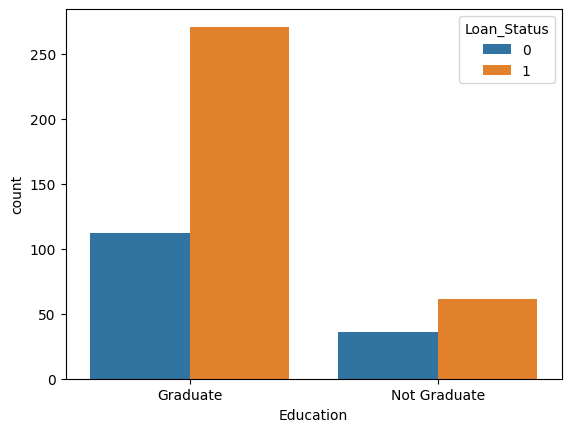

In [56]:
# education and loan status

sns.countplot(x ='Education',hue='Loan_Status',data=df)

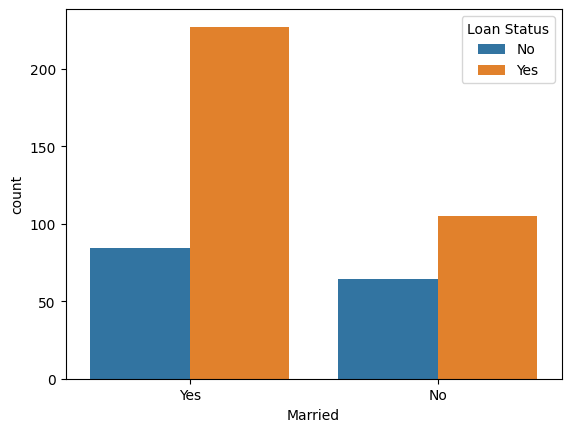

In [57]:
# marital status and loan status

sns.countplot(
    x='Married',
    hue='Loan_Status',
    data=df.assign(Loan_Status=df['Loan_Status'].map({0: 'No', 1: 'Yes'}))
)
plt.legend(title='Loan Status')
plt.show()


In [58]:
#convert the categorical columns to numerical value
df.replace({
    "Married": {"No": 0, "Yes": 1},
    "Gender": {"Male": 1, "Female": 0},
    "Self_Employed": {"No": 0, "Yes": 1},
    "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},
    "Education":{"Graduate":1,"Not Graduate":0}
}, inplace=True)

df.head()

C:\Users\adesh mahatme\AppData\Local\Temp\ipykernel_23120\3140594659.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [59]:
#label is loan status 

X = df.drop(columns=["Loan_Status","Loan_ID"])
Y = df['Loan_Status']

In [60]:
#now train and split the data for testing purpose
 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.1,random_state=2)

In [61]:
#lets check whether it is splitted properly or not

X.shape,X_train.shape,X_test.shape

((480, 11), (432, 11), (48, 11))

# Training the model
# Support Vector Machine

In [62]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

In [ ]:
#check the accuracy of the model

X_train_prediction = classifier.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)
print("The accuracy score of X_train is :",X_train_accuracy)

The accuracy score of X_train is : 0.7986111111111112


In [ ]:
X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)
print("The accuracy score of X_test is :",X_test_accuracy)

The accuracy score of X_test is : 0.8333333333333334


In [ ]:
# Input data for one applicant
input_data = [[
    0,      # Gender (Male)
    0,      # Married (Yes)
    0,      # Dependents
    0,      # Education (Graduate)
    0,      # Self_Employed (No)
    4583,   # ApplicantIncome
    1508,   # CoapplicantIncome
    1280,    # LoanAmount
    360,    # Loan_Amount_Term
    12,      # Credit_History
    0       # Property_Area (Urban)
]]

# If you used a scaler during training
# input_data = scaler.transform(input_data)

# Make prediction
prediction = classifier.predict(input_data)

# Show result
print("Loan Status:", "Approved ✅" if prediction[0] == 1 else "Rejected ❌")

Loan Status: Approved ✅


C:\Users\adesh mahatme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
